In [1]:
import pandas as pd

file_path = r"C:\Users\chris\Corporate_Environmental_Impact\data\raw\Scope-3-Environmental-Impact-Data-2022.xlsx"

df = pd.read_excel(file_path, sheet_name="0%")

In [2]:
print(df.columns)


Index(['Year', 'Company Name', 'Country', 'Industry (Exiobase)',
       'GHG Intensity (Sales)', 'GHG Intensity (Op Income)',
       'Total GHG Environmental Impact (Scope 1, 2, 3)', 'Scope 1', 'Scope 2',
       'Scope 3 ', 'Business Travel', 'Business Travel Set',
       'Business Travel Imputed', 'Capital Goods', 'Capital Goods Set',
       'Capital Goods Imputed', 'Downstream Leased Assets',
       'Downstream Leased Assets Set', 'Downstream Leased Assets Imputed',
       'Downstream Transportation and Distribution',
       'Downstream Transportation and Distribution Set',
       'Downstream Transportation and Distribution Imputed',
       'Employee Commuting', 'Employee Commuting Set',
       'Employee Commuting Imputed', 'End of Life Treatment of Sold Products',
       'End of Life Treatment of Sold Products Set',
       'End of Life Treatment of Sold Products Imputed', 'Franchises',
       'Franchises Set', 'Franchises Imputed',
       'Fuel-and-energy-related activities (not inc

In [3]:
# Check null/nan values
print(df.isnull().sum())

# Drop rows with missing values
df=df.dropna()

print(df.isnull().sum())


Year                                                                           0
Company Name                                                                   0
Country                                                                        0
Industry (Exiobase)                                                            0
GHG Intensity (Sales)                                                          5
GHG Intensity (Op Income)                                                    341
Total GHG Environmental Impact (Scope 1, 2, 3)                                 0
Scope 1                                                                        0
Scope 2                                                                        0
Scope 3                                                                        0
Business Travel                                                                0
Business Travel Set                                                            0
Business Travel Imputed     

In [4]:
# Filter if Scope 3 values are reported by companies (Imputed = 0) or predicted (Imputed=1)

imputed_cols=["Business Travel Imputed", "Capital Goods Imputed", "Downstream Leased Assets Imputed","Downstream Transportation and Distribution Imputed", "Employee Commuting Imputed", "End of Life Treatment of Sold Products Imputed",
               "Franchises Imputed", "Fuel-and-energy-related activities (not included in Scope 1 or 2) Imputed", "Investments Imputed", "Processing of Sold Products Imputed", "Purchased Goods and Services Imputed", 
               "Upstream Leased Assets Imputed", "Upstream Transportation and Distribution Imputed", "Use of Sold Products Imputed", "Waste Generated in Operations Imputed"]


# Filter for all 15 columns reported
col_fully_reported=(df[imputed_cols] == 0).all(axis=1)

df_fully_reported=df[col_fully_reported]

print(df_fully_reported.shape)

# Filter for 10 cols reported
mask = (df[imputed_cols] == 0).sum(axis=1) >= 10
df_filtered_10 = df[mask]

print(df_filtered_10.shape)

mask = (df[imputed_cols] == 0).sum(axis=1) >= 8
df_filtered_8 = df[mask]

print(df_filtered_8.shape)

mask = (df[imputed_cols] == 0).sum(axis=1) >= 5
df_filtered_5 = df[mask]

print(df_filtered_5.shape)




(12, 55)
(1328, 55)
(2422, 55)
(4266, 55)


In [5]:
# Which companies report more than others?

# Imputed Columns grouped by Industry
df['Num_Imputed'] = df[imputed_cols].sum(axis=1)
branch_avg_imputed = df.groupby("Industry (Exiobase)")["Num_Imputed"].mean().sort_values(ascending=False)
branch_avg_imputed

Industry (Exiobase)
Sale, maintenance, repair of motor vehicles, motor vehicles parts, motorcycles, motor cycles parts and accessoiries                     12.916667
Manufacture of textiles (17)                                                                                                            12.888889
Manufacture of wood and of products of wood and cork, except furniture; manufacture of articles of straw and plaiting materials (20)    12.200000
Activities auxiliary to financial intermediation (67)                                                                                   12.132231
Wholesale trade and commission trade, except of motor vehicles and motorcycles (51)                                                     12.056604
Production of electricity by solar photovoltaic                                                                                         11.733333
Manufacture of furniture; manufacturing n.e.c. (36)                                                     

C:\Users\chris\AppData\Local\Temp\ipykernel_19920\875212579.py:6: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


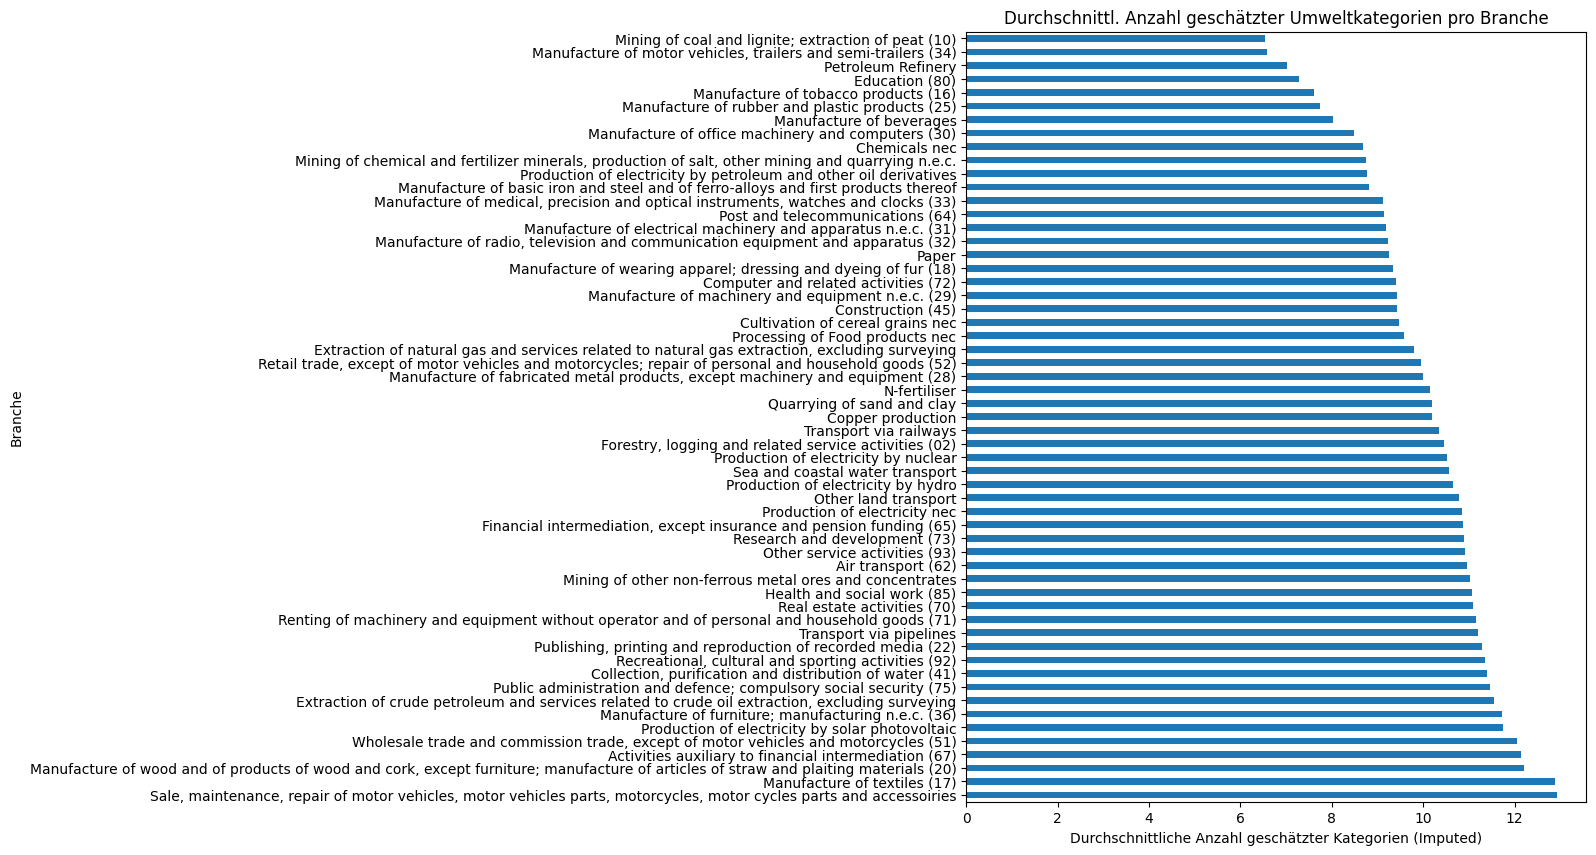

In [6]:
import matplotlib.pyplot as plt

branch_avg_imputed.plot(kind="barh", figsize=(8,10), title="Durchschnittl. Anzahl geschätzter Umweltkategorien pro Branche")
plt.xlabel("Durchschnittliche Anzahl geschätzter Kategorien (Imputed)")
plt.ylabel("Branche")
plt.tight_layout()
plt.show()

In [7]:
df['Num_Imputed'] = df[imputed_cols].sum(axis=1)
df.groupby('Industry (Exiobase)')[['Num_Imputed', 'Total GHG Environmental Impact (Scope 1, 2, 3)']].mean().sort_values(by='Num_Imputed')


,Num_Imputed,"Total GHG Environmental Impact (Scope 1, 2, 3)"
Industry (Exiobase),,
Mining of coal and lignite; extraction of peat (10),6.545455,-3.371645e+10
"Manufacture of motor vehicles, trailers and semi-trailers (34)",6.573460,-3.479102e+10
Petroleum Refinery,7.018519,-1.643262e+10
Education (80),7.285714,-2.204735e+09
Manufacture of tobacco products (16),7.605263,-2.695977e+09
Manufacture of rubber and plastic products (25),7.750000,-1.099187e+10
Manufacture of beverages,8.023810,-3.064576e+09
Manufacture of office machinery and computers (30),8.476395,-5.199198e+09
Chemicals nec,8.673295,-5.597438e+09


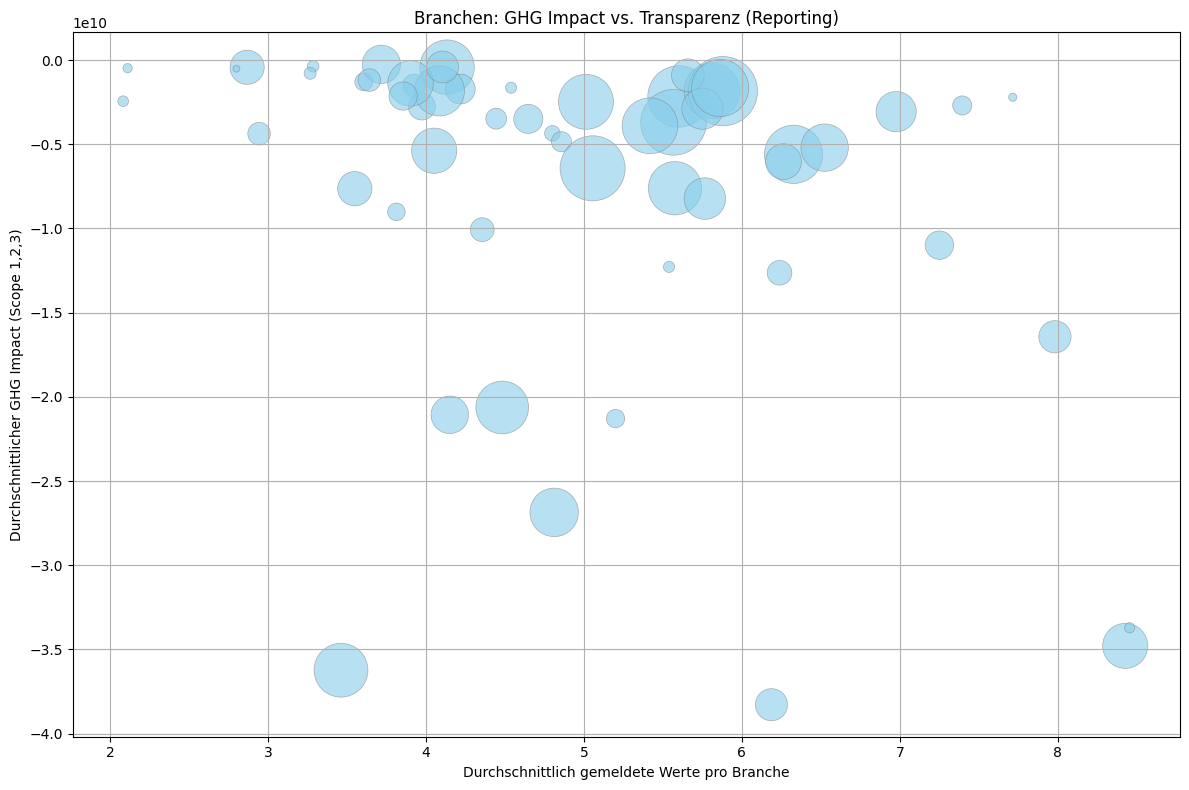

In [ ]:

# Anzahl nicht imputierter Werte berechnen
df['Num_Imputed'] = df[imputed_cols].sum(axis=1)
df['Num_Reported'] = len(imputed_cols) - df['Num_Imputed']

# Mittelwerte pro Branche berechnen
industry_summary = df.groupby('Industry (Exiobase)').agg({
    'Num_Reported': 'mean',
    'Total GHG Environmental Impact (Scope 1, 2, 3)': 'mean',
    'Company Name': 'count' 
}).rename(columns={'Company Name': 'Count'})

# Bubble Chart zeichnen
plt.figure(figsize=(12, 8))
plt.scatter(
    industry_summary['Num_Reported'],
    industry_summary['Total GHG Environmental Impact (Scope 1, 2, 3)'],
    s=industry_summary['Count'] * 5,  # Bubble-Größe skalieren
    alpha=0.6,
    c='skyblue',
    edgecolors='grey',
    linewidths=0.5
)

plt.xlabel('Durchschnittlich gemeldete Werte pro Branche')
plt.ylabel('Durchschnittlicher GHG Impact (Scope 1,2,3)')
plt.title('Branchen: GHG Impact vs. Transparenz (Reporting)')
plt.grid(True)
plt.tight_layout()

plt.show()


In [ ]:
# Anzahl der Jahre der Aufzeichnungen
print(df['Year'].unique())


[2020 2019 2018 2017 2016 2015 2014 2013 2012]


C:\Users\chris\AppData\Local\Temp\ipykernel_19920\1237491383.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_industries['GHG_Positive'] = top_10_industries['Total GHG Environmental Impact (Scope 1, 2, 3)'].abs()


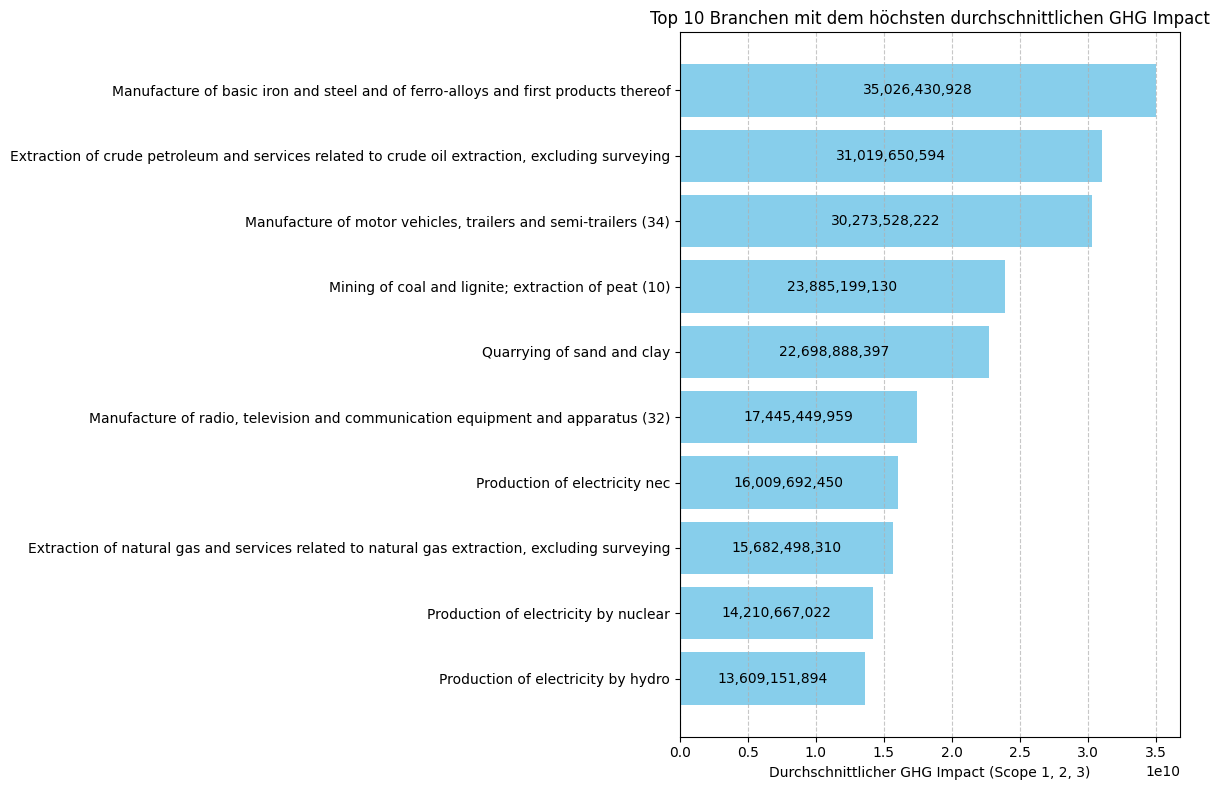

In [ ]:
# Neue Spalte mit positiven GHG-Werten
top_10_industries['GHG_Positive'] = top_10_industries['Total GHG Environmental Impact (Scope 1, 2, 3)'].abs()

# Balkendiagramm erstellen
plt.figure(figsize=(12, 8)) 
bars = plt.barh(
    top_10_industries.index, 
    top_10_industries['Total GHG Environmental Impact (Scope 1, 2, 3)'].abs(), 
    color='skyblue'
)

# Werte im Balken anzeigen
for bar in bars:
    width = bar.get_width()  # Die Breite des Balkens (der Wert)
    formatted_value = f'{width:,.0f}'  # Tausendertrennzeichen
    plt.text(width / 2, bar.get_y() + bar.get_height()/2, formatted_value, va='center', ha='center', fontsize=10, color='black')

plt.xlabel('Durchschnittlicher GHG Impact (Scope 1, 2, 3)')
plt.title('Top 10 Branchen mit dem höchsten durchschnittlichen GHG Impact')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
